### Repartition spatiale des bornes vélib

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from cartiflette.s3 import download_vectorfile_url_all

In [45]:
a_velo= gpd.read_file('amenagements-velo-en-ile-de-france.geojson')

In [7]:
a_velo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
communes = download_vectorfile_url_all(
    crs = 4326,
    borders="COMMUNE_ARRONDISSEMENT",
    values = ["75","77","78","91", "92", "93", "94","95"],
    vectorfile_format="topojson",
    filter_by="DEPARTEMENT",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022)

https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=75/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 40.1kiB [00:00, 18.0MiB/s]

https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=77/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson



Downloading: : 1.57MiB [00:00, 54.9MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=78/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 581kiB [00:00, 33.6MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=91/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 483kiB [00:00, 29.2MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=92/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 63.0kiB [00:00, 20.3MiB/s]

https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=93/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson



Downloading: : 120kiB [00:00, 28.4MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=94/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 111kiB [00:00, 27.2MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=95/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 372kiB [00:00, 23.6MiB/s]


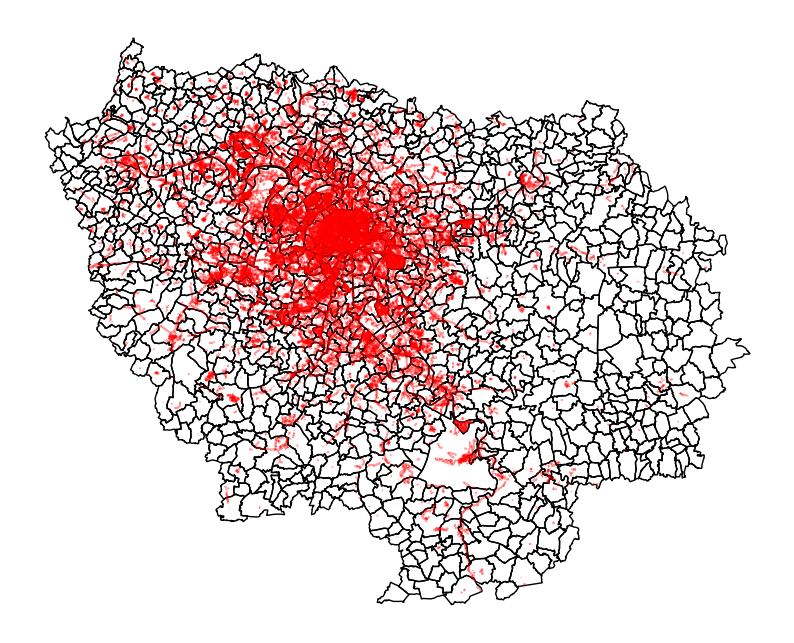

In [29]:
fig,ax = plt.subplots(figsize=(10, 10))
a_velo.plot(ax = ax, color = 'red', alpha = 0.4, zorder=2)
communes.plot(ax = ax, zorder=1, edgecolor = "black", facecolor="none")
ax.set_axis_off()

Sur la figure, on observe que le nombre d'aménagement vélo diminu au fur et à mésure qu'on s'éloigne de la petite courone

un préalable au calcul des surfaces est le choix du système de projection adéquat. Dans notre cas , il s'agit de convertir les données aux système de projection Lambert 93 qui est le plus appropié.

In [27]:
communes['surface'] = communes.to_crs(2154).area.div(10**(6))

In [28]:
communes.sort_values('surface', ascending = False)

,id,ID,NOM,NOM_M,INSEE_COM,STATUT,POPULATION,INSEE_CAN,INSEE_ARR,INSEE_DEP,INSEE_REG,SIREN_EPCI,source,INSEE_COG,geometry,surface
111,COMMUNE_0000000009739723,NaN,Fontainebleau,FONTAINEBLEAU,77186,Sous-préfecture,15696,07,4,77,11,200072346,IGN:EXPRESS-COG-CARTO-TERRITOIRE,77186,"POLYGON ((2.74740 48.48329, 2.74783 48.48327, ...",172.286422
148,COMMUNE_0000002200276627,NaN,Saint-Germain-en-Laye,SAINT-GERMAIN-EN-LAYE,78551,Sous-préfecture,44806,16,3,78,11,200058519,IGN:EXPRESS-COG-CARTO-TERRITOIRE,78551,"POLYGON ((2.07077 48.94649, 2.07138 48.94676, ...",53.134010
135,COMMUNE_0000002200276622,NaN,Chenoise-Cucharmoy,CHENOISE-CUCHARMOY,77109,Commune simple,1640,18,3,77,11,200037133,IGN:EXPRESS-COG-CARTO-TERRITOIRE,77109,"POLYGON ((3.13963 48.59977, 3.13951 48.59983, ...",48.748106
229,COMMUNE_0000000009738401,NaN,Sonchamp,SONCHAMP,78601,Commune simple,1600,14,2,78,11,200073344,IGN:EXPRESS-COG-CARTO-TERRITOIRE,78601,"POLYGON ((1.83232 48.56349, 1.83260 48.56506, ...",46.349314
152,COMMUNE_0000000009739738,NaN,Étampes,ETAMPES,91223,Sous-préfecture,25629,08,1,91,11,200017846,IGN:EXPRESS-COG-CARTO-TERRITOIRE,91223,"POLYGON ((2.23350 48.39672, 2.23293 48.39656, ...",45.962325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,COMMUNE_0000000009736527,NaN,Saint-Mandé,SAINT-MANDE,94067,Commune simple,22377,23,2,94,11,200054781/200057941,IGN:EXPRESS-COG-CARTO-TERRITOIRE,94067,"POLYGON ((2.41900 48.84939, 2.41900 48.84935, ...",0.905759
155,COMMUNE_0000000009734016,NaN,Gouzangrez,GOUZANGREZ,95282,Commune simple,160,16,3,95,11,200035970,IGN:EXPRESS-COG-CARTO-TERRITOIRE,95282,"POLYGON ((1.90588 49.11131, 1.90559 49.11143, ...",0.772590
181,COMMUNE_0000000009735023,NaN,Margency,MARGENCY,95369,Commune simple,2846,15,2,95,11,200056380,IGN:EXPRESS-COG-CARTO-TERRITOIRE,95369,"POLYGON ((2.29014 48.99680, 2.28979 48.99688, ...",0.725055
11,COMMUNE_0000000009736027,NaN,Le Pré-Saint-Gervais,LE PRE-SAINT-GERVAIS,93061,Commune simple,17351,15,1,93,11,200054781/200057875,IGN:EXPRESS-COG-CARTO-TERRITOIRE,93061,"POLYGON ((2.41151 48.88322, 2.41148 48.88315, ...",0.702744


In [32]:
a_velo['longueur'].describe()

count    112217.000000
mean        126.315959
std         174.519817
min           0.000000
25%          24.000000
50%          70.000000
75%         161.000000
max        3984.000000
Name: longueur, dtype: float64

### Décompte des aménagements cyclables par communes

In [34]:
a_velo = a_velo [a_velo ['longueur'] != 0]

In [55]:
a_velo['piste'] = a_velo['longueur'].apply(lambda x: 0 if x == 0 else 1)

In [102]:
y=a_velo.groupby('insee_com').sum(numeric_only = True).sort_values('piste', ascending = False)
y

,osm_id,longueur,piste
insee_com,,,
75112,8.194662e+11,201748,1994
75116,6.542635e+11,228240,1981
95127,8.541363e+11,124902,1549
75113,5.319723e+11,137731,1483
75115,4.767768e+11,148909,1440
...,...,...,...
77525,1.406556e+08,166,1
95046,6.241011e+08,139,1
77437,7.261289e+08,152,1


In [63]:
print(y.columns)

Index(['osm_id', 'longueur', 'piste'], dtype='object')


In [57]:
y.describe()

,osm_id,longueur,piste
count,1.005000e+03,1005.000000,1005.000000
mean,4.289913e+10,14104.276617,110.153234
std,8.424072e+10,24139.660522,218.183793
min,2.310947e+07,2.000000,1.000000
25%,3.040353e+09,1476.000000,8.000000
50%,1.227068e+10,5293.000000,30.000000
75%,4.555888e+10,15626.000000,110.000000
max,8.541363e+11,228240.000000,1994.000000


Text(0.5, 1.0, 'Distribution des pistes cyclables dans les communes')

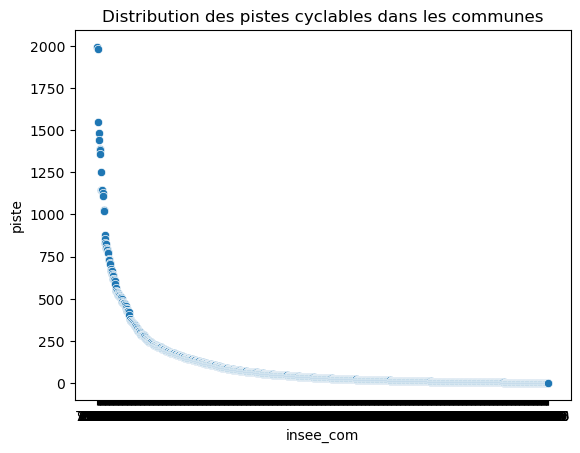

In [70]:
sns.scatterplot(y['piste'])
plt.title('Distribution des pistes cyclables dans les communes')

In [124]:
base = y.merge(communes[['insee_com', 'POPULATION', 'surface', 'geometry']], how='outer', on='insee_com')

In [130]:
base

,insee_com,osm_id,longueur,piste,POPULATION,surface,geometry
0,75112,8.194662e+11,201748.0,1994.0,NaN,NaN,None
1,75116,6.542635e+11,228240.0,1981.0,NaN,NaN,None
2,95127,8.541363e+11,124902.0,1549.0,65911.0,14.566919,"POLYGON ((2.09081 49.02428, 2.09029 49.02337, ..."
3,75113,5.319723e+11,137731.0,1483.0,NaN,NaN,None
4,75115,4.767768e+11,148909.0,1440.0,NaN,NaN,None
...,...,...,...,...,...,...,...
1302,95309,NaN,NaN,NaN,207.0,4.433144,"POLYGON ((1.78404 49.14498, 1.78370 49.14474, ..."
1303,95110,NaN,NaN,NaN,212.0,3.072376,"POLYGON ((1.95996 49.14802, 1.96035 49.14787, ..."
1304,95059,NaN,NaN,NaN,350.0,8.525855,"POLYGON ((2.03800 49.19217, 2.03824 49.19238, ..."
1305,95529,NaN,NaN,NaN,866.0,4.782057,"POLYGON ((2.18683 49.17342, 2.18698 49.17340, ..."


In [129]:
dissolved = base.dissolve(by='insee_com', aggfunc='sum')
ax = dissolved.plot(column="piste", legend=True, figsize=(10, 10))
legend = ax.get_legend()
legend.set_title("Titre de la légende")  # Remplacez par le titre souhaité

# Afficher la carte
plt.show()



AttributeError: 'DataFrame' object has no attribute 'dissolve'